In [14]:
# 데이터 전처리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['class'] = wine_load.target
wine['class'] = wine['class'].map({0:'class_0', 1:'cblass_1', 2:'class_2'})
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [15]:
wine.sort_values(by='color_intensity')  # 정랠해 보면 잘 안보일 수 있다.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0,cblass_1
89,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625.0,cblass_1
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,cblass_1
116,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0,cblass_1
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,cblass_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0,class_2
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0,class_2
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,class_2
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,class_2


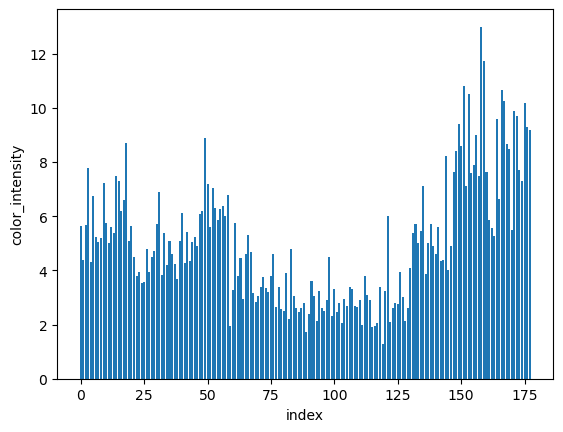

In [27]:
plt.bar(wine.index, wine['color_intensity'])
plt.xlabel('index'); plt.ylabel('color_intensity')
plt.show()

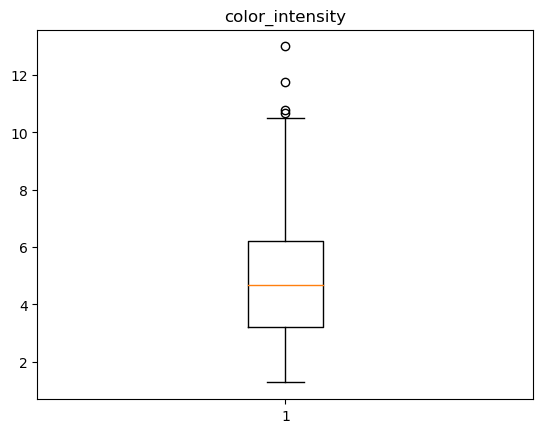

In [3]:
plt.boxplot(wine['color_intensity'])  # 이상치를 시각화하여 확인
plt.title('color_intensity')
plt.show()

In [6]:
def outliers_iqr(dt, col):
    quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
    iqr =  quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr*1.5)
    upper_whis = quartile_3 + (iqr*1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]

outliers = outliers_iqr(wine, 'color_intensity')
outliers  # outlier를 인덱스와 함께 표시

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [25]:
min(outliers['color_intensity'])

10.68

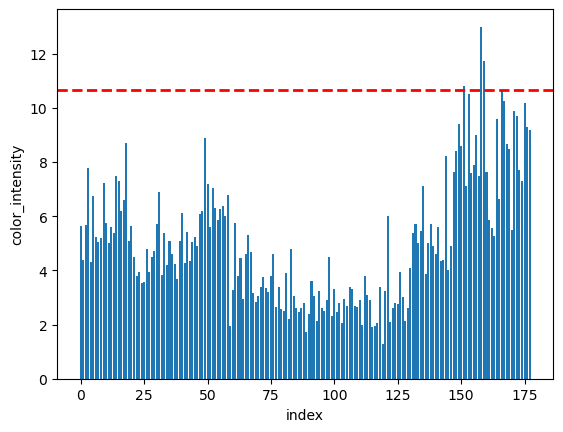

In [26]:
plt.bar(wine.index, wine['color_intensity'])
plt.xlabel('index')
plt.ylabel('color_intensity')
plt.axhline(y=min(outliers['color_intensity']), color='red', linewidth=2, linestyle='--')
plt.show()

In [28]:
# 이상치 정제
# 이상치 제거
drop_outliers = wine.drop(index=outliers.index)

# 이상치를 삭제하기 전과 후의 데이터 shape
print("Original :", wine.shape)
print("Drop outliers :", drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


In [30]:
# 이상치 대체
# 이상치를 Null로 만든다음 결측치와 함께 대체
# wine데이터세트의 'color_intensity' 컬럼의 이상치를 평균값으로 대체
wine.loc[outliers.index, 'color_intensity'] = np.NaN
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

In [31]:
# 범주형 변수 처리
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [32]:
iris_dummy= pd.get_dummies(iris, columns=['class'])
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_Setosa,class_Versicolour,class_Virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [ ]:
# 데이터 분할
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(arrays,
                                                    test_size=None,     # 테스트 사이즈 비율
                                                    train_size=None,
                                                    random_state=None,  # 임의의 번호지정, 같은 숫자를 사용하면 같은 출력
                                                    shuffle=True,       # 추철전에 데이터 섞음, False이면 섞지 않음
                                                    stratify=None)      # None이 아닌 경우 지정한 변수 기준으로 계층화되어 변수 비율 유지하여 추철
                                                    
'''
